## Part 1 implementing QAOA


### Question1 :
Write down in the cell below the Hamiltonian whose ground state is the solution to MaxCUT on an input graph $G=(V,E)$:

$$ H = \sum_{i,j\in E} \sigma_i \cdot \sigma_j $$

### Question 2:
Complete the implementation below of a simple, brute-force enumeration of all states computing the optimal solution to MaxCUT for the graph represented by 'edges'

In [1]:
import numpy as np

graph1 = [(0,1),(0,2),(1,3),(2,3)]
graph2 = [(0,1),(1,2),(0,3),(1,4),(2,5),(3,6),(4,7),(5,8),(3,4),(4,5),(6,7),(7,8)]
graph3 = [(0,1),(1,2),(0,3),(1,4),(2,5),(3,6),(4,7),(3,4),(4,5),(6,7)]
graph4 = [(0,1),(1,2),(2,3),(4,5),(5,6),(6,7),(0,4),(1,5),(2,6),(3,7)]
graph5 = [(0,1),(0,2),(1,3),(2,4),(3,5),(4,5),(1,4)]
graph6 = [(0,1),(0,2),(1,3),(2,4),(1,4)]


# choice of graph
edges = graph6

nqubits = max([max(list(v)) for v in edges])+1

#nqubits = 5
graph7 = [(i,(i+1)%nqubits) for i in range(nqubits)]+[(1,4)]


# COMPUTATION OF OPT.
best_value = len(edges)
best_b = 0
for x in range(2**nqubits):
    b = np.binary_repr(x, width=nqubits)
    b = [int(b[i]) for i in range(nqubits)]
    # TODO: Complete the computation below:
    # b[i] is equal to 0 or 1 (binary decomposition of x) 
    val = 0
    for i,j in edges:
        val += (1-2*int(b[i])) * (1-2*int(b[j]))

    # END TODO
    if val <= best_value:
        best_value = val
        best_b = b
print(best_value)
print(best_b)

-5
[1, 0, 0, 1, 1]


#### visualization of the graph

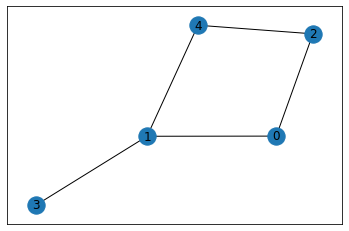

In [2]:
import networkx as nx
G = nx.Graph()
for i,j in edges:
    G.add_edge(i,j)
nx.draw_networkx(G)

In [3]:
from qat.lang.AQASM import Program, H, CNOT, RX, QRoutine, RZ, X, Z

In [4]:
def U_ZZ(theta):
    
    zz_r = QRoutine()
    zz_r.apply(CNOT, 0, 1)
    zz_r.apply(RZ(theta), 1) # difference of convention between implemented version and what we need.
    zz_r.apply(CNOT, 0, 1)

    return zz_r

### Question 3

In [5]:
def one_qaoa_layer(n_qubits, edges, theta, beta):

    layer = QRoutine()
    #TODO: implement one qaoa layer
    # first half:
    for k in range(n_qubits):
        layer.apply(RX(theta), k)
    
    # second half:
    for k, (i,j) in enumerate(edges):
        layer.apply(U_ZZ(beta), i , j)
    
    return layer

### Question 4

In [6]:
from qat.qpus import get_default_qpu

def evaluate_parameters(n_qubits, edges, parameters, n_layers):
    
    prog = Program()
    qubits = prog.qalloc(n_qubits)
    
    # TODO: implement this part.

    for k in range(n_qubits):
        prog.apply(H, qubits[k])
        
    for l in range(n_layers):
        theta, beta = parameters[2*l], parameters[2*l+1]
        prog.apply(one_qaoa_layer(n_qubits, edges, theta, beta), qubits)
        
    # END TODO
    circ = prog.to_circ()
    
    job = circ.to_job()
    qpu = get_default_qpu()
    
    result = qpu.submit(job)
    
    # BEGIN TODO
    obs = 0
    for sample in result:
        # this loop is over all 2**nqubits states.
        # sample.state.bitstring contains the qubit values (nqubits 0 or 1)
        state_val = 0
        for i,j in edges:
            state_val +=  (1-2*int(sample.state.bitstring[i])) * (1-2*int(sample.state.bitstring[j]))
        obs += sample.probability * state_val
    # END TODO
    return obs
    
        

In [7]:
import numpy as np
np.random.random(3)

array([0.68530966, 0.17492404, 0.4359012 ])

In [8]:
from scipy.optimize import minimize


### Random initialisation

### Question 5: 
réponse à la question:

0.25922511813397503 -0.9826788901382724 -1.5678841279547333 -2.3817078159808656 -3.172143093591567 -3.6306533500570586 -3.739167515033651 -3.8720886451587306 -3.924934949819175 -4.021848989361894 -4.20715583802621 -4.3556486780017485 -4.490756489443611 -4.54577954854477 -4.627394368511771 -4.721853062967204 -4.748328104835262 -4.759443083490457 -4.76343018362625 -4.768048136304631 -4.7718872902964184 -4.778459461014174 -4.7896433182711835 -4.80774510335119 -4.815093355993864 -4.818919125634083 -4.822067953307829 -4.8259547453272 -4.83114848961659 -4.839233049928171 -4.848861972664378 -4.857576360269127 -4.866909461085016 -4.869162770900255 -4.870612596446593 -4.871462088676162 -4.872641513048565 -4.873704081153553 -4.874190920039689 -4.874647890879811 -4.875146736158651 -4.8756782738943185 -4.876051420801887 -4.87636962294006 -4.876807051163935 -4.877107146798116 -4.877290290497621 -4.877504467158581 -4.877804680011011 -4.878214714217413 -4.878934288044048 -4.880220753075091 -4.8814719

-4.996090377480872 -4.996095214137482 -4.99610327582901 -4.996116481255364 -4.9961366228455235 -4.996148827222206 -4.996165203196656 -4.996192612182439 -4.9962307027593384 -4.996272451905492 -4.996297463047904 -4.996309357127611 -4.996328416601683 -4.99635216082566 -4.996362498865246 -4.996369717188144 -4.9963741090261795 -4.996378532884926 -4.996379823252295 -4.996380257827627 -4.9963804768218 -4.9963805418598275 -4.996380593069607 -4.996380672842407 -4.996380805165215 -4.996381031713272 -4.9963814160797995 -4.996381979701044 -4.996382396943606 -4.996382752910425 -4.996382883330265 -4.996382895672197 -4.99638289855875 -4.99638290030064 -4.9963829013306285 -4.996382902053915 -4.99638290519421 -4.996382908137747 -4.996382913202302 -4.996382922803776 -4.996382939920749 -4.996382971559926 -4.99638302899151 -4.99638313064745 -4.996383307036332 -4.9963836027239354 -4.996384059248262 -4.996384640238916 -4.9963851862784905 -4.996385456075147 -4.99638557302462 -4.996385686593857 -4.99638570928

-4.997856968752648 -4.997868875183678 -4.997873483233901 -4.997875286921312 -4.997877517227627 -4.9978807636984195 -4.997885171388497 -4.997887811342925 -4.997888700754986 -4.997889014853352 -4.997889152017563 -4.997889241519765 -4.997889275222616 -4.997889300597602 -4.997889343464214 -4.997889418799294 -4.997889554548921 -4.997889803242955 -4.997890258383592 -4.9978910731485495 -4.99789239851079 -4.997894033274023 -4.997896593482163 -4.997898939345832 -4.997901016947394 -4.997901316139232 -4.997901376065962 -4.997901478128186 -4.99790164636261 -4.997901889888964 -4.997902062553548 -4.997902117232534 -4.997902185531349 -4.997902201336493 -4.997902219703081 -4.9979022437755365 -4.997902287045103 -4.997902366451353 -4.997902505735764 -4.997902747790867 -4.997903145882209 -4.99790381623511 -4.99790427834539 -4.99790509100583 -4.997906511181398 -4.997908847376548 -4.997912127348422 -4.997915589985914 -4.997916370486732 -4.9979176455354635 -4.997919734229038 -4.99792285328642 -4.99792736786

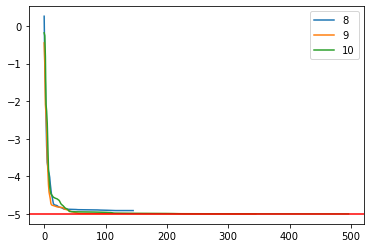

In [14]:
import matplotlib.pylab as plt


for nlayers in range(8,11,1):
    num_params = 2*nlayers

    back_trace = []
    def print_avg(xk):
        eva = evaluate_parameters(nqubits, edges, xk,nlayers)
        back_trace.append(eva)
        print(eva, end=' ')

    opt_res = minimize(lambda x : evaluate_parameters(nqubits, edges, x, nlayers), 
                       np.random.random(num_params),
                       callback=print_avg,)
    plt.plot(back_trace,label=str(nlayers))
plt.legend()
plt.axhline(best_value,color='r')

### Question 6: smart initialization

-2.1359022554561484 -2.306776065464476 -2.3786302286584586 -2.9045333067443364 -2.9264881054511744 -3.099642484499871 -3.5940932070528433 -3.7466659352665554 -3.9225399327224832 -3.9731384756016843 -3.9774168125731735 -3.978216061979363 -3.9782679225184974 -3.9782690246237724 -3.9782690296436733 -3.978269029656433 -2.599981653802828 -3.365669937488377 -3.752963314097246 -3.927281721891532 -3.9688990528476964 -4.038229676942271 -4.103386074571563 -4.104857753078438 -4.10661798090159 -4.10953125918244 -4.114516849187229 -4.121888899534035 -4.135085308133915 -4.158063698065237 -4.1897058529735745 -4.2020498503168335 -4.2106212087023644 -4.215122577501769 -4.219179085284791 -4.224487825064949 -4.232017114759143 -4.234221082260475 -4.23433112679834 -4.234344703714801 -4.234345270256756 -4.234345296012444 -4.234345297607184 -4.234345297649698 -2.9000601975243523 -2.9620235020885404 -3.514442144393431 -3.833248912662027 -3.9183466252839443 -4.041166463547166 -4.085604340591704 -4.153148360741

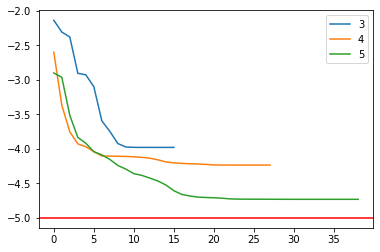

In [10]:
T = 1.

for nlayers in range(3,6,1):
    num_params = 2*nlayers

    back_trace = []
    def print_avg(xk):
        eva = evaluate_parameters(nqubits, edges, xk,nlayers)
        back_trace.append(eva)
        print(eva, end=' ')

    # TODO implement parameter init
    parameters_init = []
    for l in range(nlayers):
        parameters_init.append(T*(1-l/float(nlayers)))
        parameters_init.append(T*l/float(nlayers))

        
    opt_res = minimize(lambda x : evaluate_parameters(nqubits, edges, x, nlayers), 
                       parameters_init, 
                       callback=print_avg,)
    plt.plot(back_trace,label=str(nlayers))
plt.legend()
plt.axhline(best_value,color='r')